In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [33]:
df = pd.read_csv('data/weightlifting_workouts.csv')
df.head()


,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Distance,Seconds,Notes,Workout Notes
0,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),1,135.0,8,0.0,0,NaN,NaN
1,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),2,135.0,8,0.0,0,NaN,NaN
2,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),3,135.0,5,0.0,0,NaN,NaN
3,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),4,185.0,7,0.0,0,NaN,NaN
4,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),5,230.0,8,0.0,0,NaN,NaN


In [34]:
df = df.drop(['Distance','Seconds', 'Notes', 'Workout Notes'], axis = 1)
df.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps
0,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),1,135.0,8
1,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),2,135.0,8
2,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),3,135.0,5
3,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),4,185.0,7
4,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),5,230.0,8


In [35]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %H:%M:%S')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9932 non-null   datetime64[ns]
 1   Workout Name   9932 non-null   object        
 2   Exercise Name  9932 non-null   object        
 3   Set Order      9932 non-null   int64         
 4   Weight         9932 non-null   float64       
 5   Reps           9932 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 465.7+ KB


In [58]:
df['Weekday'] = df['Date'].apply(datetime.datetime.weekday)
df['Weekday'] = df['Weekday'].astype('str')
df.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Weekday
0,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),1,135.0,8,4
1,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),2,135.0,8,4
2,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),3,135.0,5,4
3,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),4,185.0,7,4
4,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),5,230.0,8,4


In [67]:
weekday_dict = {'0':'Monday', '1': 'Tuesday', '2':'Wednesday', '3':'Thursday', '4':'Friday', '5':'Saturday', '6':'Sunday'}
df['Weekday'] = df['Weekday'].replace(weekday_dict)

In [75]:
df['Time'] = df['Date'].apply(datetime.datetime.time)

In [76]:
df.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Weekday,Time
0,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),1,135.0,8,Friday,17:06:37
1,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),2,135.0,8,Friday,17:06:37
2,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),3,135.0,5,Friday,17:06:37
3,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),4,185.0,7,Friday,17:06:37
4,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),5,230.0,8,Friday,17:06:37


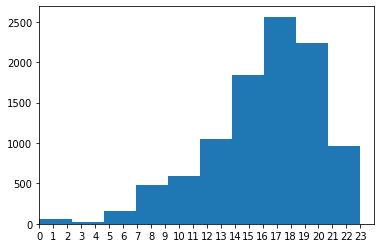

In [82]:
def chart(occurance_list):
    hour_list = [t.hour for t in occurance_list]
    numbers=[x for x in range(0,24)]
    labels=map(lambda x: str(x), numbers)
    plt.xticks(numbers, labels)
    plt.xlim(0,24)
    plt.hist(hour_list)
    plt.show()
    
chart(df.Time)

In [92]:
df['Time_Period'] = df['Date'].apply(lambda x: 'morning' if x.hour < 11 else ('afternoon' if x.hour < 5 else 'night'))

In [89]:
df['Date'][1].hour

17

In [88]:
df.dtypes

Date             datetime64[ns]
Workout Name             object
Exercise Name            object
Set Order                 int64
Weight                  float64
Reps                      int64
Weekday                  object
Time                     object
dtype: object

In [93]:
df.head()

,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Weekday,Time,Time_Period
0,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),1,135.0,8,Friday,17:06:37,night
1,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),2,135.0,8,Friday,17:06:37,night
2,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),3,135.0,5,Friday,17:06:37,night
3,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),4,185.0,7,Friday,17:06:37,night
4,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),5,230.0,8,Friday,17:06:37,night


In [ ]:
# look into clustering workouts into categories and find the strength improvement for each exercise over time
# how does the time of day effect the effort put into the workouts (more energy before work = better workout?)
# are earlier sets able to drive a higher RPE
# which exercises does this individual push themselves the hardest on and improve on the most over the time
# what rep range is the best for strength improvement
# group the workouts by workout name or exercise